■ **Samsung_Electronics.csv** 파일을 load한 후,  **Close** 열만 추출하여, **7:3으로 training과 test data를 분리**하고, **과거 5일 데이터값으로 다음 날 주식값을 예측**하는 **RNN model**을 학습하고, 하나의 차트에 **실제 주식값, training data와 test data의 예측 값을 서로 다른 색상으로 나타내시오.** <br><br>
■ <strong><font color='red' style='bold'>주석을 이용하여 각 과정의 역할과 변수의 의미를 상세히 서술하시오.</font></strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# 필요 모듈 설치 과정
# RNN Model 학습 과정에서 필요한 모듈 설치
# 결과 차트 출력을 위한 모듈 설치

In [3]:
# csv 데이터셋 stock 변수에 저장 및 load
dataset = pd.read_csv('Samsung_Electronics.csv')
stock = dataset.values
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,68400,69900,68300,69500,66878.50000,29703942
1,2020-12-03,70100,70500,69300,69700,67070.95313,23677989
2,2020-12-04,70400,72100,70100,71500,68803.05469,28130533
3,2020-12-07,72400,73500,71900,72900,70150.25000,28490496
4,2020-12-08,72200,72900,71600,71700,68995.50781,25000338


In [4]:
# 데이터셋에서 close 열만 추출
pos = stock[:,4:5]
print(pos)

[[69500]
 [69700]
 [71500]
 [72900]
 [71700]
 [73900]
 [72900]
 [73400]
 [73800]
 [73800]
 [73800]
 [73300]
 [73000]
 [73000]
 [72300]
 [73900]
 [77800]
 [78700]
 [78300]
 [81000]
 [83000]
 [83900]
 [82200]
 [82900]
 [88800]
 [91000]
 [90600]
 [89700]
 [89700]
 [88000]
 [85000]
 [87000]
 [87200]
 [88100]
 [86800]
 [89400]
 [86700]
 [85600]
 [83700]
 [82000]
 [83000]
 [84400]
 [84600]
 [82500]
 [83500]
 [83000]
 [82700]
 [81600]
 [84200]
 [84900]
 [83200]
 [82100]
 [82600]
 [82200]
 [82000]
 [82000]
 [85300]
 [82500]
 [83600]
 [84000]
 [82400]
 [82100]
 [82000]
 [81400]
 [80900]
 [82000]
 [82800]
 [81800]
 [82800]
 [82300]
 [82900]
 [81900]
 [82000]
 [81800]
 [81000]
 [81200]
 [81500]
 [81600]
 [82200]
 [81400]
 [82900]
 [84800]
 [85400]
 [86000]
 [85600]
 [84700]
 [83600]
 [83200]
 [84000]
 [84000]
 [84100]
 [83900]
 [83300]
 [83900]
 [82600]
 [82400]
 [82800]
 [83500]
 [82900]
 [82100]
 [81700]
 [81500]
 [81700]
 [82600]
 [82300]
 [81900]
 [83200]
 [81200]
 [80000]
 [78500]
 [80100]
 

In [5]:
# 7:3 training, test data 분리
from sklearn.model_selection import train_test_split
train_pos,test_pos = train_test_split(pos,test_size=0.3,shuffle=False)
# train_test_split의 shuffle parameter를 False로 지정

In [6]:
print(train_pos.shape, test_pos.shape)

(173, 1) (75, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(train_pos)
train_pos_sc = sc.transform(train_pos)
# training data 중 최소값, 최대값을 각각 0과 1로 지정한 후, 비율에 따라 값을 정함
# test data의 값은 training data 이후의 값이다.
# 하지만 지속적으로 증가하는 값은 아니다.

In [8]:
print(train_pos_sc)

[[0.        ]
 [0.00930233]
 [0.09302326]
 [0.15813953]
 [0.10232558]
 [0.20465116]
 [0.15813953]
 [0.18139535]
 [0.2       ]
 [0.2       ]
 [0.2       ]
 [0.17674419]
 [0.1627907 ]
 [0.1627907 ]
 [0.13023256]
 [0.20465116]
 [0.38604651]
 [0.42790698]
 [0.40930233]
 [0.53488372]
 [0.62790698]
 [0.66976744]
 [0.59069767]
 [0.62325581]
 [0.89767442]
 [1.        ]
 [0.98139535]
 [0.93953488]
 [0.93953488]
 [0.86046512]
 [0.72093023]
 [0.81395349]
 [0.82325581]
 [0.86511628]
 [0.80465116]
 [0.9255814 ]
 [0.8       ]
 [0.74883721]
 [0.66046512]
 [0.58139535]
 [0.62790698]
 [0.69302326]
 [0.70232558]
 [0.60465116]
 [0.65116279]
 [0.62790698]
 [0.61395349]
 [0.5627907 ]
 [0.68372093]
 [0.71627907]
 [0.6372093 ]
 [0.58604651]
 [0.60930233]
 [0.59069767]
 [0.58139535]
 [0.58139535]
 [0.73488372]
 [0.60465116]
 [0.65581395]
 [0.6744186 ]
 [0.6       ]
 [0.58604651]
 [0.58139535]
 [0.55348837]
 [0.53023256]
 [0.58139535]
 [0.61860465]
 [0.57209302]
 [0.61860465]
 [0.59534884]
 [0.62325581]
 [0.57

In [10]:
# time_step: 필요한 과거 데이터 수
def create_RNN_stock(data,time_step):
    X = []
    y = []
    for i in range(len(data)-time_step):
        # X와 y의 조합을 생성할 수 있는 마지막 index i는
        # dataset의 마지막 index - time_step
        X.append(data[i:i+time_step,:])
        y.append(data[i+time_step,:])
    return np.array(X),np.array(y)

In [16]:
# 5일의 과거 데이터가 필요하기에 sampling 과정에 반영
sample = np.array([['d0'],['d1'],['d2'],['d3'],['d4'],['d5']])
sample_X, sample_y = create_RNN_stock(sample,5)
print(np.concatenate((sample_X.reshape(-1,5),sample_y.reshape(-1,1)),axis=1))

[['d0' 'd1' 'd2' 'd3' 'd4' 'd5']]


In [17]:
look_back = 5
Xsc_train,ysc_train = create_RNN_stock(train_pos_sc,look_back)
Xsc_test,ysc_test = create_RNN_stock(sc.transform(test_pos),look_back)

In [18]:
print(Xsc_train.shape,Xsc_test.shape)
# shape = (sample의 수, time_step, X 특징의 수)
print(ysc_train.shape,ysc_test.shape)
# shape = (sample의 수, y 특징의 수)

(168, 5, 1) (70, 5, 1)
(168, 1) (70, 1)


In [20]:
# 데이터 검토
# 5일간의 데이터 이기에 reshape 에 대입
print(np.concatenate((Xsc_train[50:55,].reshape(-1,5),ysc_train[50:55,:]),axis=1))
# 이전 step의 y가 다음 step의 X의 원소로 포함됨

[[0.6372093  0.58604651 0.60930233 0.59069767 0.58139535 0.58139535]
 [0.58604651 0.60930233 0.59069767 0.58139535 0.58139535 0.73488372]
 [0.60930233 0.59069767 0.58139535 0.58139535 0.73488372 0.60465116]
 [0.59069767 0.58139535 0.58139535 0.73488372 0.60465116 0.65581395]
 [0.58139535 0.58139535 0.73488372 0.60465116 0.65581395 0.6744186 ]]


In [21]:
# tensorflow RNN형식에 맞춘 shape
# input_shape = (sample의 수, X 특징의 수, time_step)
# 현재 X_train = (sample의 수, time_step, X 특징의 수)

train_num = Xsc_train.shape[0]
test_num = Xsc_test.shape[0]

features = Xsc_train.shape[2]
time_step = look_back
# or time_step = X_train.shape[1]
Xsc_train_RNN = Xsc_train.reshape(train_num,features,time_step)
Xsc_test_RNN = Xsc_test.reshape(test_num,features,time_step)

In [22]:
RNN_model = Sequential([
    SimpleRNN(5,input_shape=(features,time_step),activation='tanh'),
    # 첫번째 layer → 두번째 layer(memory cell(hidden layer))
    # SimpleRNN(hidden layer node의 수, input_shape, activation)
    # input_shape = (X특징의 수, time_step)
    # RNN의 activation은 일반적으로 tanh를 사용함 (default가 tanh이므로 생략 가능)
    Dense(1,activation='linear')
    # 두번째 layer → 세번째 layer(output layer)
    # output layer node의 수는 1 (하나의 y를 예측)
    # regression의 경우, output layer의 activation function은 linear
])

In [23]:
RNN_model.summary()
# 학습 모델 내용

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 55        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
RNN_model.compile(optimizer='adam',loss='mse')
# regression의 경우 주로 loss를 mse로 설정함

In [25]:
print(Xsc_train_RNN.shape)
print(ysc_train.shape)

(168, 1, 5)
(168, 1)


In [26]:
RNN_model.fit(Xsc_train_RNN,ysc_train,epochs=10,batch_size=1)
# 모델 학습

Epoch 1/10

168/168 [==============================] - 1s 788us/step - loss: 0.0393
Epoch 2/10
168/168 [==============================] - 0s 758us/step - loss: 0.0148
Epoch 3/10
168/168 [==============================] - 0s 764us/step - loss: 0.0147
Epoch 4/10
168/168 [==============================] - 0s 764us/step - loss: 0.0126
Epoch 5/10
168/168 [==============================] - 0s 758us/step - loss: 0.0126
Epoch 6/10
168/168 [==============================] - 0s 770us/step - loss: 0.0113
Epoch 7/10
168/168 [==============================] - 0s 764us/step - loss: 0.0107
Epoch 8/10
168/168 [==============================] - 0s 764us/step - loss: 0.0097
Epoch 9/10
168/168 [==============================] - 0s 764us/step - loss: 0.0091
Epoch 10/10
168/168 [==============================] - 0s 764us/step - loss: 0.0085


In [27]:
ysc_train_pred = RNN_model.predict(Xsc_train_RNN)
ysc_test_pred = RNN_model.predict(Xsc_test_RNN)

3/3 [==============================] - 0s 499us/step


In [28]:
y_train_pred = sc.inverse_transform(ysc_train_pred)
y_test_pred = sc.inverse_transform(ysc_test_pred)

In [29]:
# scale 전후 데이터 비교
print(y_train_pred[50],ysc_train_pred[50])

[82437.73] [0.60175484]


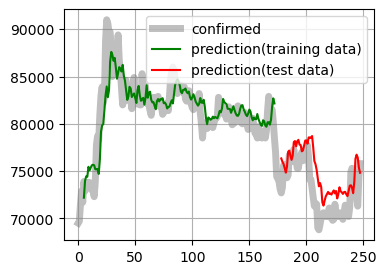

In [30]:
plt.figure(figsize=(4,3))
plt.plot(pos,linewidth=5,color='gray',alpha=0.5,label='confirmed')
# training index: 첫 time step만큼의 value는 없음
tr_ind = range(time_step,time_step+len(y_train_pred))
plt.plot(tr_ind,y_train_pred,color='green',label='prediction(training data)')
# test index: training의 마지막 index + time_step에서 시작
te_ind = range(time_step+len(y_train_pred)+time_step,len(pos))
plt.plot(te_ind,y_test_pred,color='red',label='prediction(test data)')

plt.legend()
plt.grid()